Becky's EDA for Fraud Case Study

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

import string
import re as re
from sklearn.preprocessing import LabelEncoder
# from scipy.stats import 
# import statsmodels.api as sm


In [143]:
df = pd.read_json('~/data.json')

In [144]:
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,1283870102,3,,None,NaN,NaN,None,None
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acct_type           14337 non-null  object 
 1   approx_payout_date  14337 non-null  int64  
 2   body_length         14337 non-null  int64  
 3   channels            14337 non-null  int64  
 4   country             14256 non-null  object 
 5   currency            14337 non-null  object 
 6   delivery_method     14321 non-null  float64
 7   description         14337 non-null  object 
 8   email_domain        14337 non-null  object 
 9   event_created       14337 non-null  int64  
 10  event_end           14337 non-null  int64  
 11  event_published     14238 non-null  float64
 12  event_start         14337 non-null  int64  
 13  fb_published        14337 non-null  int64  
 14  gts                 14337 non-null  float64
 15  has_analytics       14337 non-null  int64  
 16  has_

In [146]:
df['fraud'] = df.acct_type.str.contains('fraud')

In [147]:
df.fraud.value_counts(normalize=True)

False    0.909814
True     0.090186
Name: fraud, dtype: float64

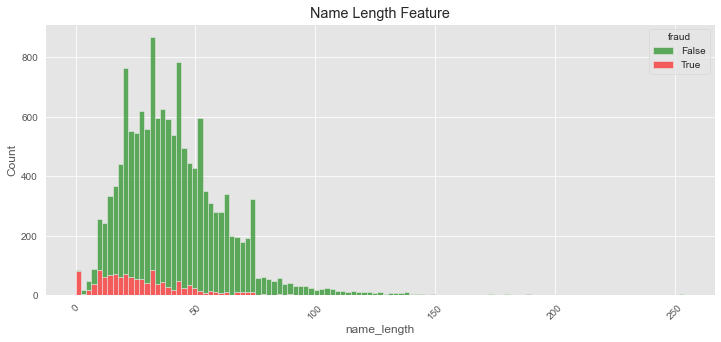

In [148]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(data=df, x='name_length', hue='fraud', palette={True:'r', False:'g'}, multiple='stack', alpha=.6)
ax.tick_params(axis='x', rotation=45)
ax.set_title('Name Length Feature')
sns.set_style('whitegrid')

#### NLP on Description Column

In [149]:
model_df = df.copy()

In [256]:
# remove html tags on description strings in df

def remove_html_tags(string):
    result = re.sub('(<[^>]+>|/\r?\n|\r/g&amp\xa0)','',string)
    result = re.sub('\n', '', result)
    result = re.sub('\r', '', result)
    result = re.sub('\xa0', '', result)
    result = re.sub('&amp', '', result)
    result = re.sub('&nbsp', '', result)
    result = re.sub('\'', '', result)
    return result


In [257]:
model_df['desc_no_html']=model_df['description'].apply(lambda cw : remove_html_tags(cw))

In [258]:
def caps_ratio(str): 
    caps = 0
    for ch in str: 
        if ch.isupper(): 
            caps += 1
    if len(str) == 0: 
        return 0
    else: 
        return caps / len(str)

In [259]:
# maybe fraudulent events have more punctuation in their name or description?? 

def punctuation_ratio(str): 
    punc = 0
    for ch in str: 
        if ch in string.punctuation: 
            punc += 1
    if len(str) == 0: 
        return 0
    else: 
        return punc / len(str)

In [260]:
model_df['name_punc_ratio'] = model_df['name'].apply(punctuation_ratio)
model_df['desc_no_html']=model_df['description'].apply(lambda cw : remove_html_tags(cw))
model_df['desc_punc_ratio'] = model_df['desc_no_html'].apply(punctuation_ratio)
model_df['name_caps_ratio'] = model_df['name'].apply(caps_ratio)
model_df['desc_caps_ratio'] = model_df['desc_no_html'].apply(caps_ratio)
model_df['org_name_caps_ratio'] = model_df['org_name'].apply(caps_ratio)
model_df['org_name_punc_ratio'] = model_df['org_name'].apply(punctuation_ratio)
model_df['org_desc_caps_ratio'] = model_df['org_desc'].apply(caps_ratio)
model_df['org_desc_punc_ratio'] = model_df['org_desc'].apply(punctuation_ratio)

In [261]:
model_df.org_desc_punc_ratio.mean()

0.07168149722397742

In [262]:
model_df.iloc[5790]

acct_type                                                fraudster_event
approx_payout_date                                            1357452000
body_length                                                           10
channels                                                               0
country                                                               IN
currency                                                             USD
delivery_method                                                      0.0
description                                                   <p>NEW</p>
email_domain                                    indglobal-consulting.com
event_created                                                 1356509213
event_end                                                     1357020000
event_published                                             1356509316.0
event_start                                                   1357009200
fb_published                                       

In [263]:
fraud_df = model_df[model_df['fraud']==True]

In [264]:
no_fraud_df = model_df[model_df['fraud']==False]

In [375]:
fraud_df.desc_no_html.iloc[1]

'Welcome5th Annual Earth Transformation Conference: Igniting the Inner Spark Additional seminars before and afterDec 29, 2010 –Feb 28, 2011 sessionFeaturing: Bracohttp://earthtransformation.com/'

In [266]:
no_fraud_df.name[:20]

1                           Winthrop RUF Winter Getaway
2                          DRDP (2010) Teacher Training
3                                 ITTA Affiliation 2013
4     Self Defense for Writers and Filmmakers: For A...
5          Bluegrass Stallions vs Rochester Razorsharks
6                  Fridays at Four Frederick 2011-02-11
7                          When Jekyll Met Hyde (1960s)
8                                   A Sweetheart Affair
9                          When Jekyll Met Hyde (1950s)
10    Understanding and Supporting Families with Dom...
11      Wild Seafood: San Francisco Fishing Tour Feb 13
12    LinkedIn Profiles Plus (BAC) – Ft. Worth, TX, ...
13    CSPA Presenting Guy Kawasaki Enchantment - The...
14                               Simply Stylist Seminar
15    Race to Nowhere, Candlewood Middle School, Dix...
16    Race to Nowhere, Endicott College, hosted by C...
17       Martin England & the Recontructed Benefit Show
18              IPCybercrime Boot Camp - Vancouv

In [267]:
fraud_df.name_caps_ratio.mean(), no_fraud_df.name_caps_ratio.mean()

(0.23123055070533466, 0.1906027974949279)

In [268]:
fraud_df.desc_caps_ratio.mean(), no_fraud_df.desc_caps_ratio.mean()

(0.09648388803100365, 0.07081739670105888)

In [269]:
from wordcloud import WordCloud

In [270]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [329]:
import texthero as hero
from texthero import preprocessing
custom_pipeline = [preprocessing.fillna,
                   #preprocessing.lowercase,
                   preprocessing.remove_whitespace,
                   preprocessing.remove_diacritics
                   #preprocessing.remove_brackets
                  ]

In [331]:
fraud_df['clean_text'] = hero.clean(fraud_df['desc_no_html'], custom_pipeline)
fraud_df['clean_text'] = [n.replace('{','') for n in fraud_df['clean_text']]
fraud_df['clean_text'] = [n.replace('}','') for n in fraud_df['clean_text']]
fraud_df['clean_text'] = [n.replace('(','') for n in fraud_df['clean_text']]
fraud_df['clean_text'] = [n.replace(')','') for n in fraud_df['clean_text']]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [341]:
no_fraud_df['clean_text'] = hero.clean(no_fraud_df['desc_no_html'], custom_pipeline)
no_fraud_df['clean_text'] = [n.replace('{','') for n in no_fraud_df['clean_text']]
no_fraud_df['clean_text'] = [n.replace('}','') for n in no_fraud_df['clean_text']]
no_fraud_df['clean_text'] = [n.replace('(','') for n in no_fraud_df['clean_text']]
no_fraud_df['clean_text'] = [n.replace(')','') for n in no_fraud_df['clean_text']]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [342]:
no_fraud_df.clean_text

1        Join us for a quick, one-night, community-buil...
2        Teacher Training on the Desired Results Develo...
3        Affiliations are now due in respect of the 201...
4        Writers and filmmakers need to understand thei...
5        Come join the Bluegrass Stallions as they take...
                               ...                        
14330                                                     
14331    Mastered the basics of IntelliPlex and now loo...
14333    2013 Scientist of the YearHonoring Eric J. Top...
14334    What a way to start off your Mothers Day ladie...
14335    Valentines Day At Salsa Con FuegoSalsa Con Fue...
Name: clean_text, Length: 13044, dtype: object

In [343]:
fraud_event_desc_corpus = fraud_df.clean_text.values.tolist()
no_fraud_event_desc_corpus = no_fraud_df.clean_text.values.tolist()


In [344]:
whole_corpus = [fraud_event_desc_corpus, no_fraud_event_desc_corpus]
type(whole_corpus)

list

In [345]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range = (1,1), max_df = .6, min_df = .01)


In [360]:
Z = vectorizer.fit_transform(no_fraud_event_desc_corpus)

In [361]:
feature_names = vectorizer.get_feature_names()

In [362]:
dense = Z.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)

In [363]:
data = df.transpose()
data.columns = no_fraud_df.index

In [364]:
# Find top 30 words in fraud corpus
top_30 = data.iloc[:,0].sort_values(ascending=False).head(30)

In [365]:
top_30

winter            0.251476
dinner            0.239938
responsible       0.224232
north             0.199847
participation     0.161473
transportation    0.160983
saturday          0.160299
bus               0.160026
trip              0.157177
noon              0.156610
downtown          0.153031
medical           0.150624
church            0.146717
january           0.140052
head              0.138065
staff             0.136636
leave             0.135271
arrive            0.133363
bring             0.131009
available         0.129264
university        0.114179
friday            0.113202
night             0.098396
need              0.095522
registering       0.084974
hospital          0.084758
clean             0.084546
drop              0.083926
air               0.083825
ends              0.083725
Name: 1, dtype: float64

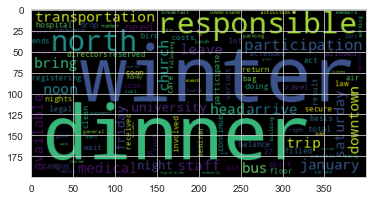

In [366]:
no_fraud_wordcloud = WordCloud().generate_from_frequencies(data.iloc[:,0])
plt.imshow(no_fraud_wordcloud)

(-0.5, 2999.5, 1999.5, -0.5)

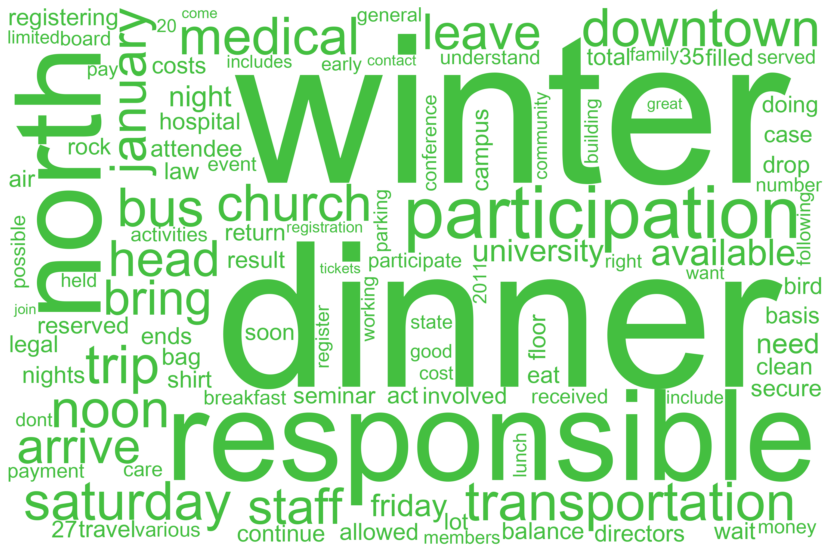

In [367]:
# SOURCE : https://towardsdatascience.com/how-to-make-word-clouds-in-python-that-dont-suck-86518cdcb61f

'''-----'''
# change the value to black
def green_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(118,50%,50%)")
# set the wordcloud background color to white
# set max_words to 1000
# set width and height to higher quality, 3000 x 2000
wordcloud = WordCloud(font_path = '/Library/Fonts/Arial Unicode.ttf', background_color="white", width=3000, height=2000, max_words=500).generate_from_frequencies(data.iloc[:,0])
# set the word color to black
wordcloud.recolor(color_func = green_color_func)
# set the figsize
plt.figure(figsize=[15,10])
# plot the wordcloud
plt.imshow(wordcloud, interpolation="bilinear")
# remove plot axes
plt.axis("off")
# save the image


In [370]:
# Document similarity between test event desc and fraud / no-fraud descriptions: 

In [390]:
import pickle

In [391]:
import json
with open('fraud_event_desc_corpus.txt', 'w') as f:
    f.write(json.dumps(fraud_event_desc_corpus))


In [392]:
with open('no_fraud_event_desc_corpus.txt', 'w') as f:
    f.write(json.dumps(no_fraud_event_desc_corpus))


In [387]:
fraud_event_desc_corpus

['Party Starz Entertaintment ; Diverse International Group Presents...The Official"99 Hour No Sleep" Super Bowl Weekend Grand FinaleNo matter who wins or loses, this post-game party cannot be missed! Enjoy the drink specials and all night music!The ultimate "99 No Sleep"Super Bowl Weekend Grand Finale! Sunday, February 7th, 2010 @ Ink Nightclub-South Beach 717 Washington Ave, Miami Bch, FL 33139.Hosted by 99 Jamz with special appearances by Fast Life Youngstaz. Special invited guests: Billy Blue, Dorrough and Brisco and with performances by various artists and many many more at South BeachMiamis finest venue! This is a party you have to see to believe! This is everyones last chance to make that impression, so donthalf-step, bring your "A" gameand party withall of the hottest artists, celebrities, models and superstar athletes that are guaranteed to be in the building!DJ Q ; DJ Slym will ber keepig the party jumping til the sun comes up with the hottest Hip-Hop, R;B, Reggae, Old School 

In [382]:
# Get doc sim to FRAUD EVENTS

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = TfidfVectorizer(stop_words='english', ngram_range = (1,1), max_df = .6, min_df = .01)
docs_tfidf = vectorizer.fit_transform(fraud_event_desc_corpus)

def get_fraud_similarity(vectorizer, docs_tfidf, query):
    """
    vectorizer: TfIdfVectorizer model
    docs_tfidf: tfidf vectors for all docs
    query: query doc

    return: cosine similarity between query and all docs
    """
    query_tfidf = vectorizer.transform([query])
    cosineSimilarities = cosine_similarity(query_tfidf, docs_tfidf).flatten()
    return cosineSimilarities.mean()

In [383]:
get_fraud_similarity(vectorizer, 
                            docs_tfidf, 
                            'Welcome5th Annual Earth Transformation Conference: Igniting the Inner Spark Additional seminars before and afterDec 29, 2010 –Feb 28, 2011 sessionFeaturing: Bracohttp://earthtransformation.com/')

0.0255909845456558

In [384]:
vectorizer_2 = TfidfVectorizer(stop_words='english', ngram_range = (1,1), max_df = .6, min_df = .01)
docs_tfidf_2 = vectorizer_2.fit_transform(no_fraud_event_desc_corpus)

def get_no_fraud_similarity(vectorizer, docs_tfidf, query):
    """
    vectorizer: TfIdfVectorizer model
    docs_tfidf: tfidf vectors for all docs
    query: query doc

    return: cosine similarity between query and all docs
    """
    query_tfidf = vectorizer_2.transform([query])
    cosineSimilarities = cosine_similarity(query_tfidf, docs_tfidf_2).flatten()
    return cosineSimilarities.mean()

In [385]:
get_no_fraud_similarity(vectorizer, 
                            docs_tfidf, 
                            'Welcome5th Annual Earth Transformation Conference: Igniting the Inner Spark Additional seminars before and afterDec 29, 2010 –Feb 28, 2011 sessionFeaturing: Bracohttp://earthtransformation.com/')

0.014464993205039883